Data collection

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMG_SIZE=256
BATCH_SIZE=32
EPOCHS=50

tensorflow data set api fetching to making the images as batches

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "tomato",
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE,IMG_SIZE),
    shuffle=True,
    
)

Found 10000 files belonging to 10 classes.


In [5]:
class_name=dataset.class_names
class_name

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

length --> batch

80%--> train,
20% --> 10% for valid , 10% for test

In [6]:
train_set=dataset.take(250)

Like the validation , test dataset

In [7]:
test_ds=dataset.skip(250)
valid_set=test_ds.take(31)
test_set=test_ds.skip(31)

Function for neetness :)

In [8]:
def get_partision_dataset_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    size_ds=len(ds)
    if shuffle:
        ds.shuffle(shuffle_size,seed=15)

    train_size=int(size_ds*train_split)
    valid_size=int(size_ds*val_split)

    train_set=ds.take(train_size)
    valid_set=ds.skip(train_size).take(valid_size)
    test_set=ds.skip(train_size).skip(valid_size)
    return train_set,valid_set,test_set

In [9]:
train_set,valid_set,test_set=get_partision_dataset_tf(dataset)



to improve the performance we use the cache()-->it keep the fetched image for the next use , prefetch()--> like an piplele method....... it is optimezed for training.

In [10]:
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_set = valid_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set = test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

changing the rgp color into like 0-255 to 0,1

make the model to predict in the IMG_SIZE,IMG_SIZE

because various input image in different sizes

In [11]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE,IMG_SIZE),
    layers.Rescaling(1.0/255)
])

make the model robust 

Data Agumentation concept: make the single image in different form (ie. high contrast , rotate the image, hor/ver flip , zoomed ) like our model can predit the image robust manner.

In [12]:
data_agumentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

using CNN's for this

make the layer by layer 
1)rezise and rescale
2)data argument
3) filter layer like matrix multiplication to filter matrix.

convolution layer-->pooling year-->cnn layer-->pooling....

standard flow ==>Conv2D → MaxPooling2D → Conv2D → MaxPooling2D → Flatten → Dense → Softmax

https://chatgpt.com/c/67cd1bd4-1220-8008-8365-2a8eb44b1f45

Step	Layer Type	                       Purpose
1	    Input Layer	                       Specifies the input size of the image (input_shape=(IMG_SIZE, IMG_SIZE, 3))
2	    Rescaling / Data Augmentation	   Normalize and augment the image data
3	    Conv2D	                           Extract low-level features (edges, textures)
4	    MaxPooling2D	                   Reduce spatial dimensions to avoid overfitting
5	    Conv2D	                           Extract higher-level features
6	    MaxPooling2D	                   Further reduce the image size
7	    Flatten                        	   Convert 2D output to 1D
8	    Dense	                           Fully connected layer for learning
9	    Dropout (optional)	               Prevent overfitting by disabling random neurons
10	    Output Dense Layer	               Final classification layer (Softmax for multi-class, Sigmoid for binary)

In [13]:
input_shape=(IMG_SIZE, IMG_SIZE, 3)
n_classes=10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(n_classes, activation='softmax')
])


c:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,226 (598.54 KB)

 Trainable params: 153,226 (598.54 KB)

 Non-trainable params: 0 (0.00 B)

Flatten the 2d arrays

In [15]:
model.compile(  
    optimizer='adam',  
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("✅ cuDNN Loaded Successfully.")
else:
    print("❌ .")


❌ .


In [17]:
with tf.device('/GPU:0'):
    history=model.fit(
        train_set, 
        batch_size=BATCH_SIZE,  
        epochs=EPOCHS,  
        validation_data=valid_set,
        verbose=1
    )

Epoch 1/50


KeyboardInterrupt: 

In [19]:
scores=model.evaluate(test_set)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.1302 - loss: 2.3014


In [ ]:
model_version=1
model.export(f"models/{model_version}")

#model.save("models/potatoes.h5")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets


Saved artifact at 'models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2176910065104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176910065296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176932743888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176932744656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176932742736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176932743120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176932745808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176932745040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176932744848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176932746768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176932746576: TensorSpec(shape=(), dtype

model testing

In [40]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict(model, image_path, class_names, img_height, img_width):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(img_height, img_width))  # Resize image to model's expected size
    img_array = img_to_array(img)  # Convert image to array
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img_array)

    # Get predicted class and confidence
    predicted_class = class_names[np.argmax(predictions[0])]  # Map class index to class name
    confidence = round(100 * (np.max(predictions[0])), 2)  # Confidence score as percentage
    
    return predicted_class, confidence


In [63]:
from PIL import Image
image_path = 'sport1.png'
image = Image.open(image_path)
width, height = image.size
sav_model=tf.keras.models.load_model('models/potatoes.h5')

predicted_class, confidence = predict(
    sav_model,
    image_path,
    ['Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'],
    height,
    width )
print(f"Predicted Class: {predicted_class}, Confidence: {confidence}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Class: Tomato___Early_blight, Confidence: 76.06999969482422%


In [36]:
def pre(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


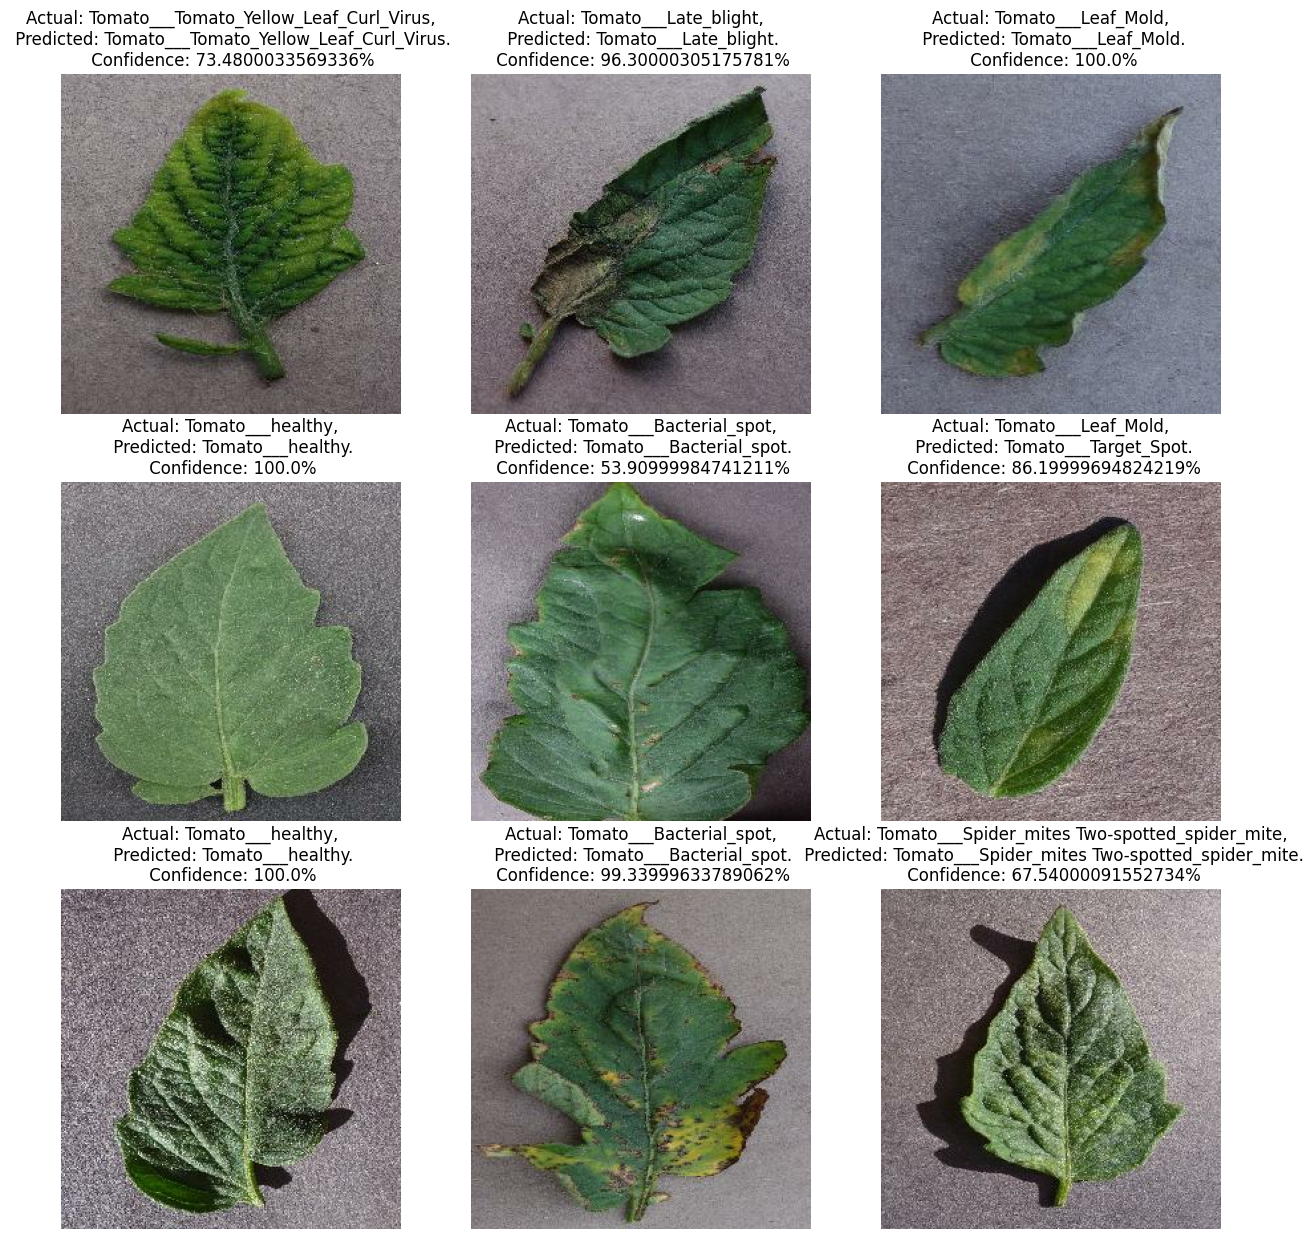

In [53]:
plt.figure(figsize=(15, 15))
for images, labels in test_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = pre(sav_model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")